In [352]:
import pandas as pd
from ggplot import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

project_id = "the-d-team-164512"

query = """\
SELECT
  COUNT(*) AS transaction_count
  , DATE(t.Dispense_Week) AS date
FROM dthon.transactions_all_c2 t
GROUP BY date
ORDER BY date ASC
"""

df_all = pd.read_gbq(query, project_id)
df_all.date = pd.Series(df_all.date).apply(pd.to_datetime, format='%Y-%m-%d')
# df_all = df_all.set_index('date')
df_all.head(3)

Waiting for job to complete...


,transaction_count,date
0,1,2008-03-09
1,1,2008-08-03
2,3,2008-11-02


## As part of the Melbourne Datathon 2017 we were given 60 million prescription transactions. Plotting those over times shows that the bulk of them start in 2011 so let's trim our data to start there.

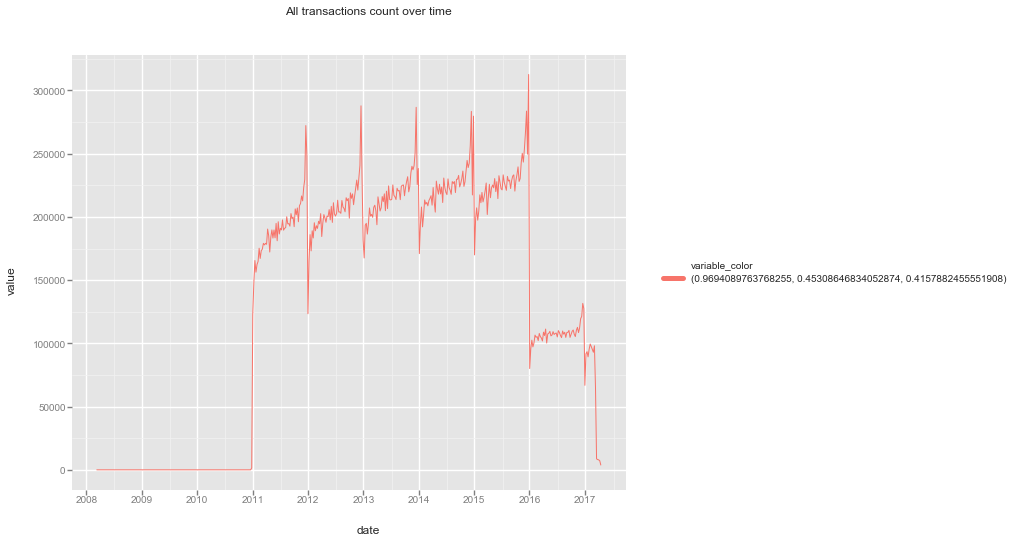

<ggplot: (-9223372036557164386)>

In [357]:
df_all_ltd = pd.melt(df_all, id_vars=['date'])
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_all_ltd) +\
    labs(title = 'All transactions count over time') +\
    geom_line()

plot.save('01_all_data.svg', width=None, height=None, dpi=180)
plot

## There is still a big drop off in transaction count volume in 2016 so for the moment lets drop that out.

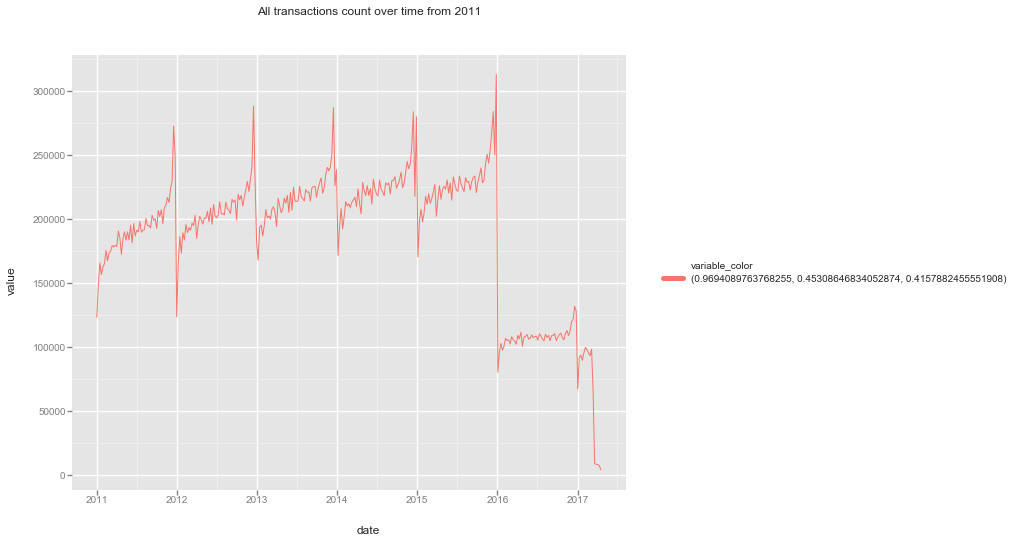

<ggplot: (-9223372036557195064)>

In [358]:
df_tmp = df_all
df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp['2011-01-01' : ]
df_tmp = df_tmp.reset_index()

df_tmp_ltd = pd.melt(df_tmp, id_vars=['date'])
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_tmp_ltd) +\
    labs(title = 'All transactions count over time from 2011') +\
    geom_line()

plot.save('02_from_2011.svg', width=None, height=None, dpi=180)
plot

## Much better but we still seem to have a drop off at the end of every year. We can smooth it out by month, quarter and finally by year when the drop off disappears. That is much better we now have a smooth relatively constant gradient across 2011 to 2016.

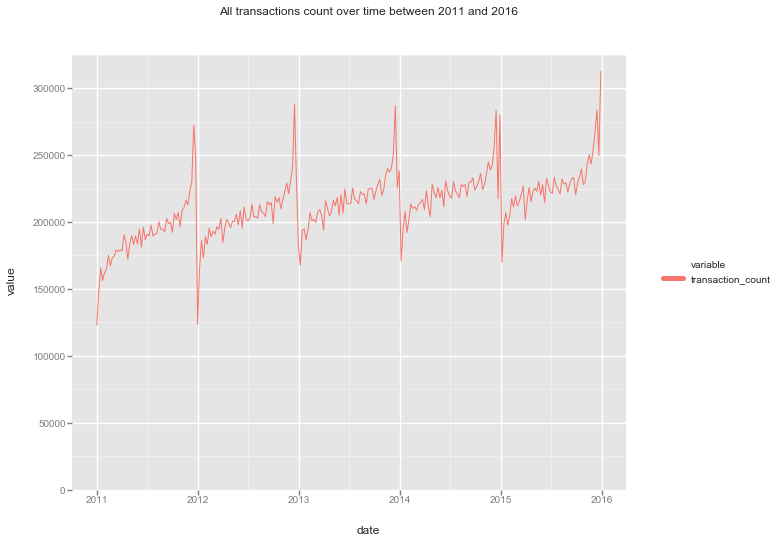

<ggplot: (-9223372036556354528)>


/opt/boxen/homebrew/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


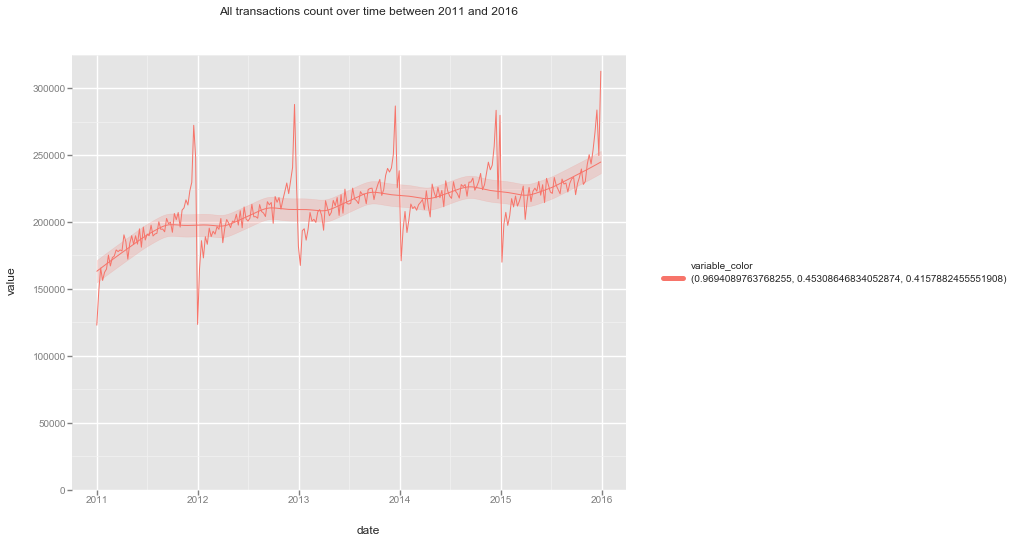

<ggplot: (296151037)>


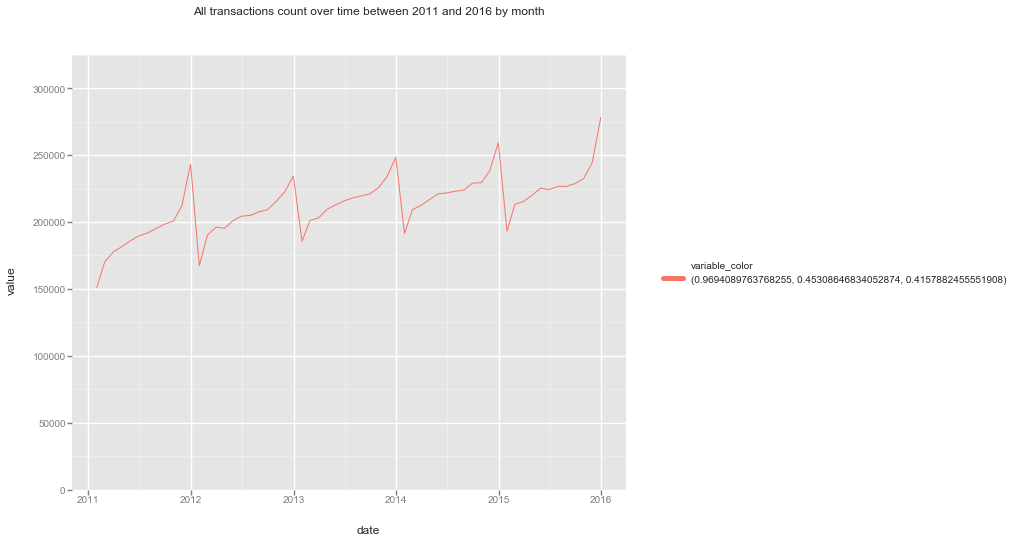

<ggplot: (-9223372036556562018)>


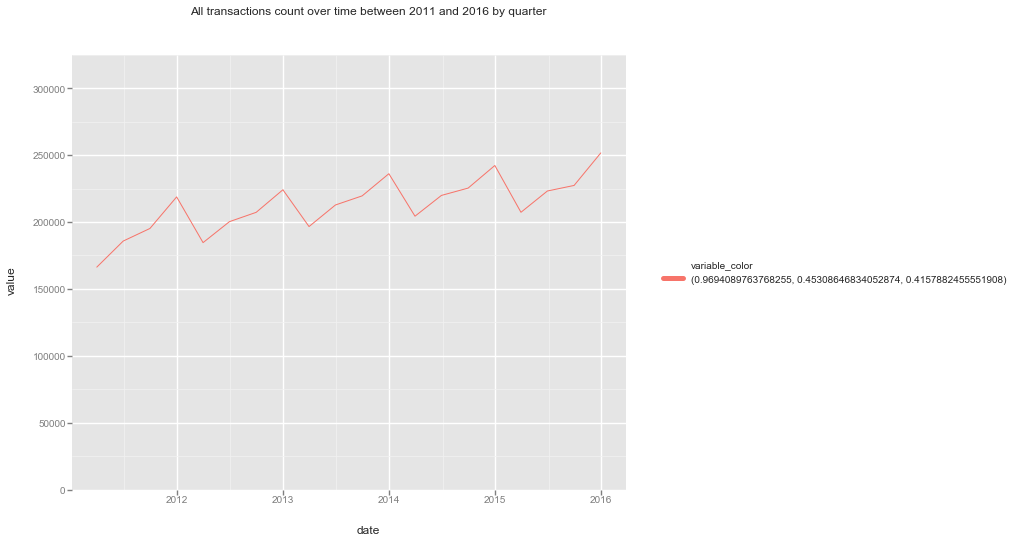

<ggplot: (-9223372036556965544)>


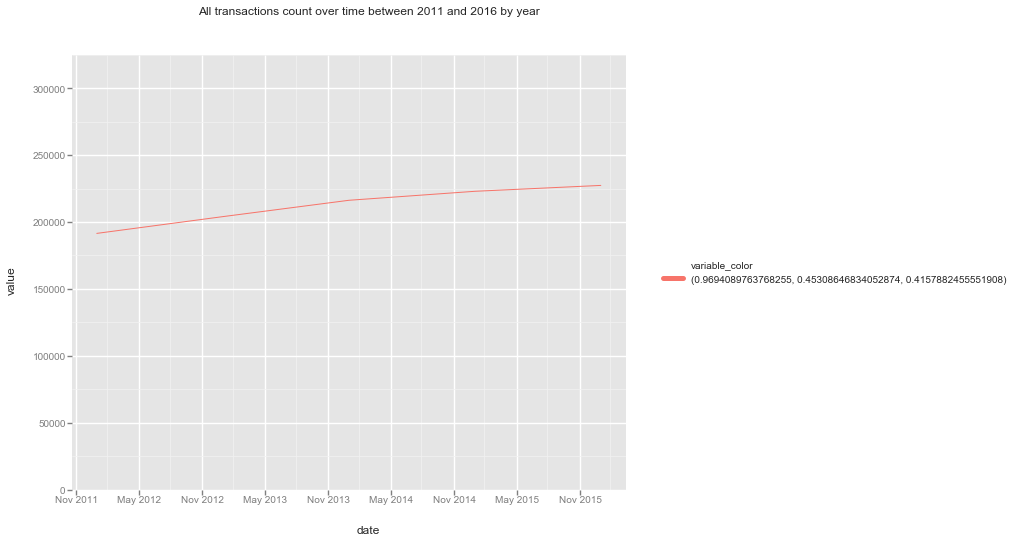

<ggplot: (298046321)>


In [359]:
df_tmp = df_all
df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp['2011-01-01' : '2016-01-01']
df_tmp = df_tmp.reset_index()

df_tmp_ltd = pd.melt(df_tmp, id_vars=['date'])
print(ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_tmp_ltd) +\
    labs(title = 'All transactions count over time between 2011 and 2016') +\
    geom_line() +\
    scale_y_continuous(limits=(0,325000)))

plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_tmp_ltd) +\
    labs(title = 'All transactions count over time between 2011 and 2016') +\
    geom_line() +\
    stat_smooth(colour='blue', span=0.2) +\
    scale_x_date(labels = date_format("%Y")) +\
    scale_y_continuous(limits=(0,325000))

plot.save('03_all_2011_to_2016.svg', width=None, height=None, dpi=180)
print(plot)

df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp.resample('M')
df_tmp = df_tmp.reset_index()
df_tmp_ltd = pd.melt(df_tmp, id_vars=['date'])
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_tmp_ltd) +\
    labs(title = 'All transactions count over time between 2011 and 2016 by month') +\
    geom_line() +\
    scale_y_continuous(limits=(0,325000))

plot.save('04_all_2011_to_2016_month.svg', width=None, height=None, dpi=180)
print(plot)
    
df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp.resample('Q')
df_tmp = df_tmp.reset_index()
df_tmp_ltd = pd.melt(df_tmp, id_vars=['date'])
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_tmp_ltd) +\
    labs(title = 'All transactions count over time between 2011 and 2016 by quarter') +\
    geom_line() +\
    scale_y_continuous(limits=(0,325000))

plot.save('05_all_2011_to_2016_quarter.svg', width=None, height=None, dpi=180)
print(plot)

df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp.resample('A')
df_tmp = df_tmp.reset_index()
df_tmp_ltd = pd.melt(df_tmp, id_vars=['date'])
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_tmp_ltd) +\
    labs(title = 'All transactions count over time between 2011 and 2016 by year') +\
    geom_line() +\
    scale_y_continuous(limits=(0,325000))

plot.save('06_all_2011_to_2016_year.svg', width=None, height=None, dpi=180)
print(plot)

## Lets take a look at the end of year drop off and see what is happening, here we have zoomed in on June 2011 to June 2012

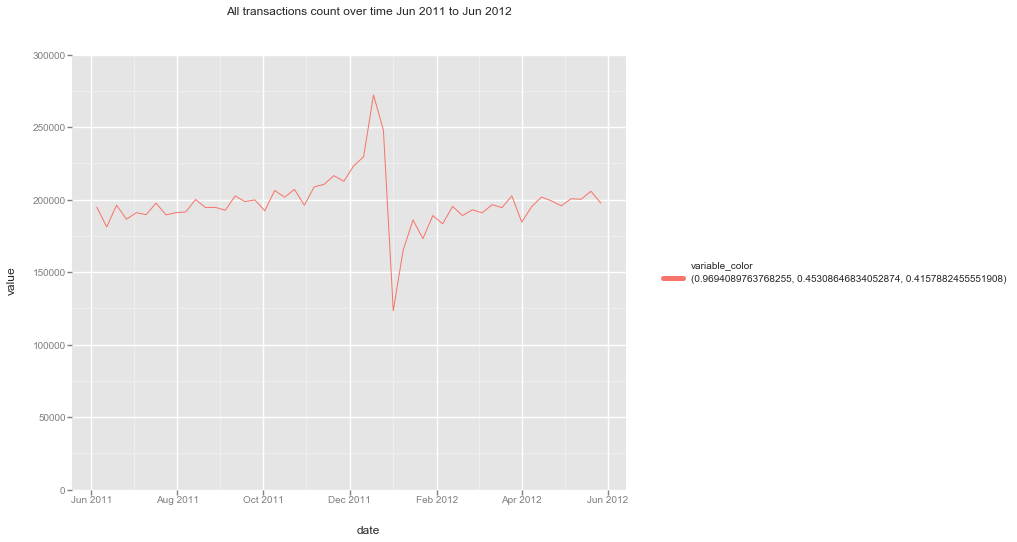

<ggplot: (298319501)>


In [362]:
df_tmp = df_all
df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp['2011-06-01' : '2012-06-01']
df_tmp = df_tmp.reset_index()

df_tmp_ltd = pd.melt(df_tmp, id_vars=['date'])
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_tmp_ltd) +\
    labs(title = 'All transactions count over time Jun 2011 to Jun 2012') +\
    geom_line() +\
    scale_y_continuous(limits=(0,300000))

plot.save('07_all_jun_2011_to_2012.svg', width=None, height=None, dpi=180)
print(plot)

In [361]:
query = """\
SELECT
  COUNT(*) AS transaction_count
  , SUM(t.PatientPrice_Amt) AS patient_amt
  , SUM(t.WholeSalePrice_Amt) AS wholesale_amt
  , SUM(t.GovernmentReclaim_Amt) AS reclaim_amt
  , DATE(t.Dispense_Week) AS date
FROM dthon.transactions_all_c2 t
GROUP BY date
ORDER BY date ASC
"""

df_amt = pd.read_gbq(query, project_id)
df_amt.date = pd.Series(df_amt.date).apply(pd.to_datetime, format='%Y-%m-%d')
# df_all = df_all.set_index('date')
df_amt.head(3)

Waiting for job to complete...


,transaction_count,patient_amt,wholesale_amt,reclaim_amt,date
0,1,5.0,0,46.92,2008-03-09
1,1,5.0,0,12.61,2008-08-03
2,3,49.8,0,0.00,2008-11-02


## Bringing in some other transaction data like patient, wholesale and Government rebate amounts. With that we can calculate profit and profit per transaction. Where profit = [PATIENT AMOUNT] + [GOV RECLAIM AMOUNT] - [WHOLESALE].

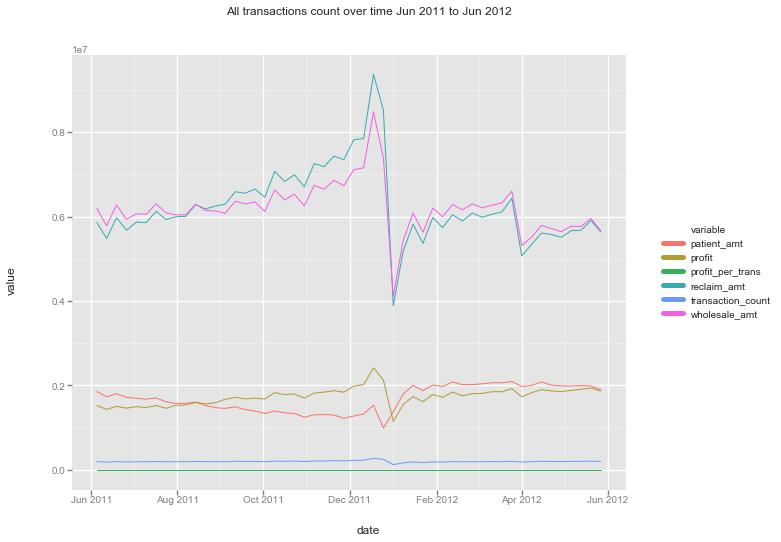

In [376]:
df_tmp = df_amt
df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp['2011-06-01' : '2012-06-01']
df_tmp['profit'] = df_tmp.patient_amt + df_tmp.reclaim_amt - df_tmp.wholesale_amt
df_tmp['profit_per_trans'] = df_tmp.profit / df_tmp.transaction_count
df_tmp = df_tmp.reset_index()

df_tmp_ltd = pd.melt(df_tmp, id_vars=['date'])
plot = ggplot(
    aes(x='date', y='value', color='variable'),
    data=df_tmp_ltd) +\
    labs(title = 'All transactions count over time Jun 2011 to Jun 2012') +\
    geom_line()

plot.save('08_all_and_amt_jun_2011_to_2012.svg', width=None, height=None, dpi=180)
# print(plot) # THIS BREAKS THE LEGEND???

## As the magnitudes are so great and different we want to look at their variance and variance logarithmically, here profit per transation seems to have the least variance so maybe it has removed the drop?

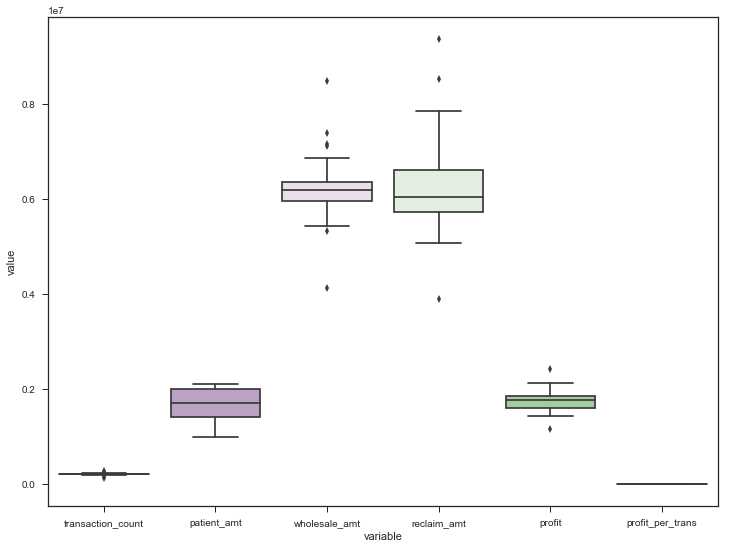

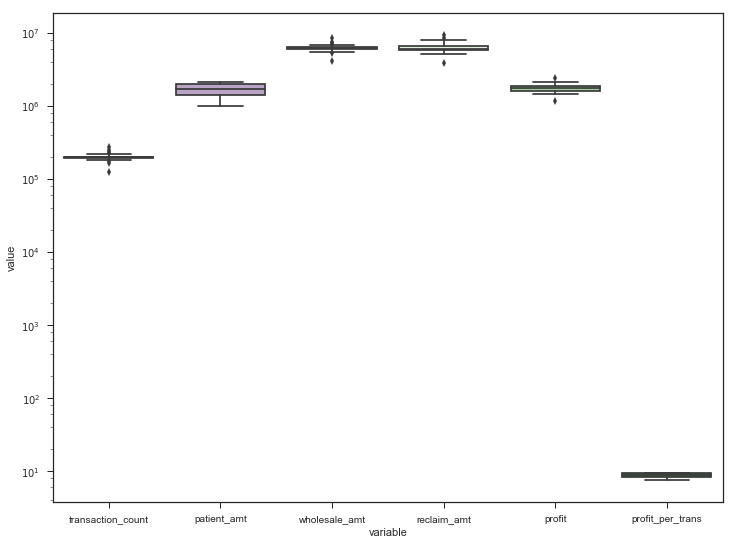

In [398]:
df_tmp = df_amt
df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp['2011-06-01' : '2012-06-01']
df_tmp['profit'] = df_tmp.patient_amt + df_tmp.reclaim_amt - df_tmp.wholesale_amt
df_tmp['profit_per_trans'] = df_tmp.profit / df_tmp.transaction_count
df_tmp = df_tmp.reset_index()

# TODO can you do it in ggplot?
# df_tmp_ltd = pd.melt(df_tmp, value_vars=['reclaim_amt', 'transaction_count', 'patient_amt'])
# print(df_tmp_ltd)
# df_tmp_ltd.set_index('date')
# print(ggplot(
#     aes(x='value', y='variable'),
#     data=df_tmp_ltd) +\
#     labs(title = 'All transactions count over time Jun 2011 to Jun 2012') +\
#     geom_boxplot())

# TODO the plotly alternative
# df_tmp.plot.box()
# df_tmp.plot.box().set_yscale('log')

df_lng = pd.melt(df_tmp, id_vars=['date'])

sns.set(style="ticks")
sns.despine(offset=10, trim=True)

ax = sns.boxplot(x="variable", y="value", data=df_lng, palette="PRGn")
fig = plt.gcf()
fig.set_size_inches(12, 9)
fig.savefig('09_amt_box.svg', dpi=100)
plt.show()

ax_log = sns.boxplot(x="variable", y="value", data=df_lng, palette="PRGn")
ax_log.set_yscale('log')
fig = plt.gcf()
fig.set_size_inches(12, 9)
fig.savefig('10_amt_box_log.svg', dpi=100)

## Corellation shows that patient amount is most reverse corellated to transaction count as well as reclaim amount. Normalising these values and comparing shows that Patient cost is opposite to government reclaim amount.

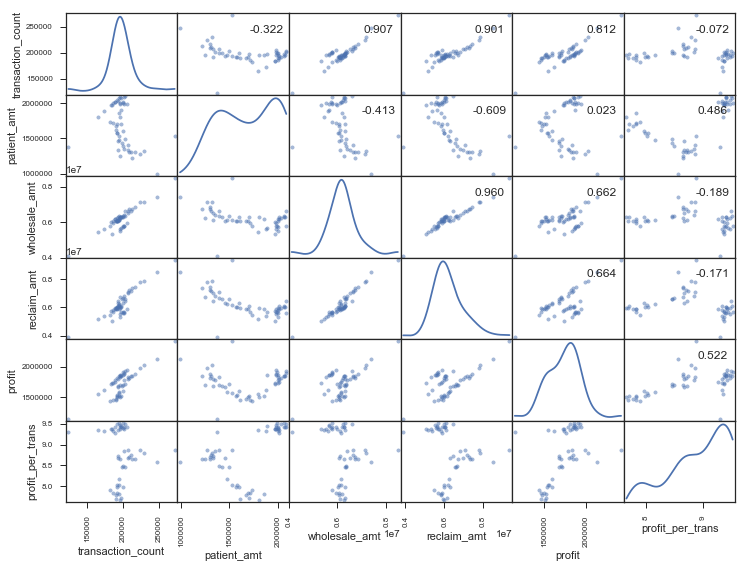

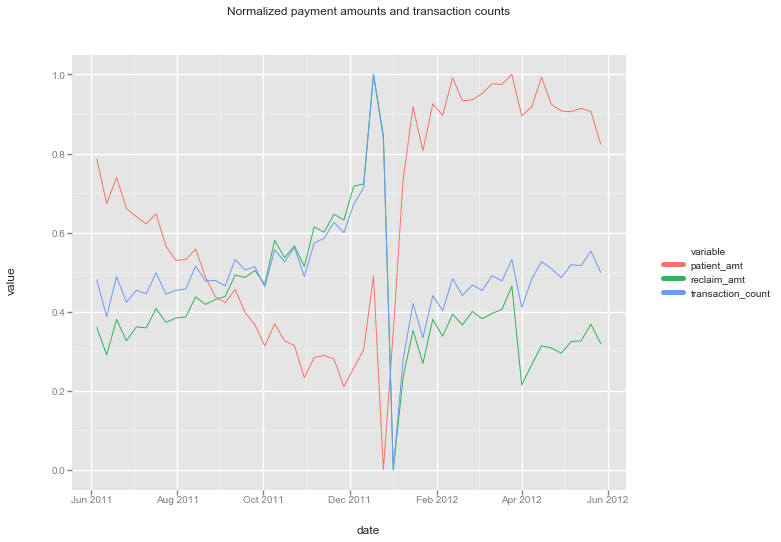

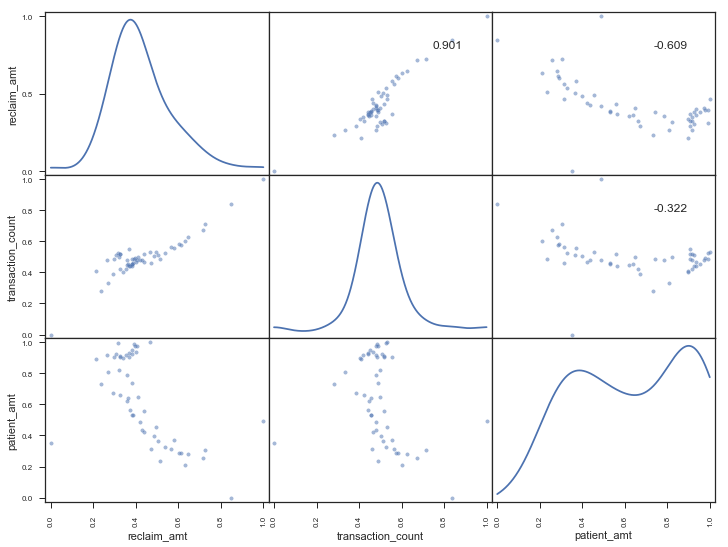

In [403]:
df_tmp = df_amt
df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp['2011-06-01' : '2012-06-01']
df_tmp['profit'] = df_tmp.patient_amt + df_tmp.reclaim_amt - df_tmp.wholesale_amt
df_tmp['profit_per_trans'] = df_tmp.profit / df_tmp.transaction_count
df_tmp = df_tmp.reset_index()

from pandas.tools.plotting import scatter_matrix
axes = scatter_matrix(df_tmp, alpha=0.5, diagonal='kde')
corr = df_tmp.corr().as_matrix()
fig = plt.gcf()
fig.set_size_inches(12, 9)
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()
# TODO make this work
plt.savefig('12_amt_corr.svg', dpi=100)


from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

df_tmp = df_tmp.set_index('date')
colnames = df_tmp.columns.values
colnames = ['reclaim_amt', 'transaction_count', 'patient_amt']
x = df_tmp[colnames].dropna()
df_tmp = df_tmp.reset_index()
df_index = x.index
x_scaled = min_max_scaler.fit_transform(x)

df = pd.DataFrame(x_scaled, columns=colnames, index=df_index)
df = df.reset_index()

df_lng = pd.melt(df, id_vars=['date'])
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_lng) +\
    labs(title = 'Normalized payment amounts and transaction counts') +\
    geom_line()

plot.save('13_norm_amt_jun_2011_to_2012.svg', width=None, height=None, dpi=180)

from pandas.tools.plotting import scatter_matrix
axes = scatter_matrix(df, alpha=0.5, diagonal='kde')
corr = df.corr().as_matrix()
fig = plt.gcf()
fig.set_size_inches(12, 9)
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()
# TODO make this work
plt.savefig('14_amt_norm_corr.svg', dpi=100)

## Zoomin in on December to January and we see a switch over between a patient paying less to suddenly paying more then the government reclaim.

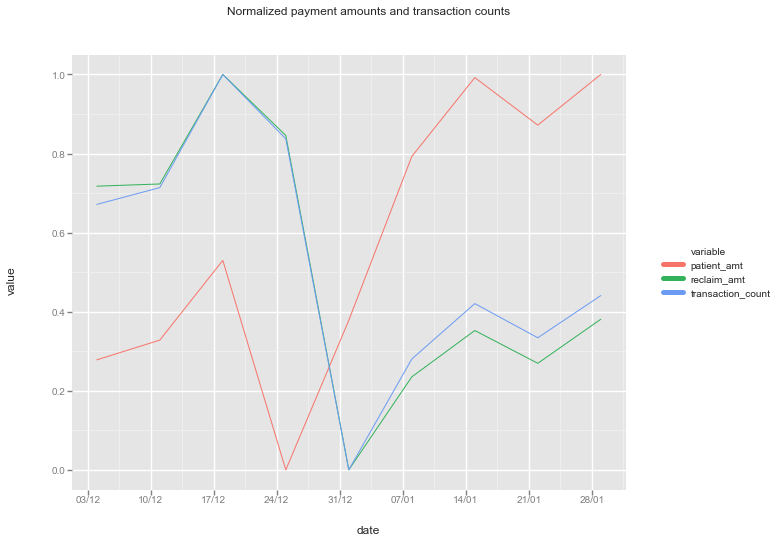

In [404]:
df_tmp = df_amt
df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp['2011-12-01' : '2012-02-01']
df_tmp['profit'] = df_tmp.patient_amt + df_tmp.reclaim_amt - df_tmp.wholesale_amt
df_tmp['profit_per_trans'] = df_tmp.profit / df_tmp.transaction_count
df_tmp = df_tmp.reset_index()

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

df_tmp = df_tmp.set_index('date')
colnames = df_tmp.columns.values
colnames = ['reclaim_amt', 'transaction_count', 'patient_amt']
x = df_tmp[colnames].dropna()
df_tmp = df_tmp.reset_index()
df_index = x.index
x_scaled = min_max_scaler.fit_transform(x)

df = pd.DataFrame(x_scaled, columns=colnames, index=df_index)
df = df.reset_index()

df_lng = pd.melt(df, id_vars=['date'])
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_lng) +\
    labs(title = 'Normalized payment amounts and transaction counts') +\
    geom_line() +\
    scale_x_date(labels = date_format("%d/%m"))

plot.save('15_norm_amt_dec_2011_to_jan_2012.svg', width=None, height=None, dpi=180)

## This switches back around September each year.

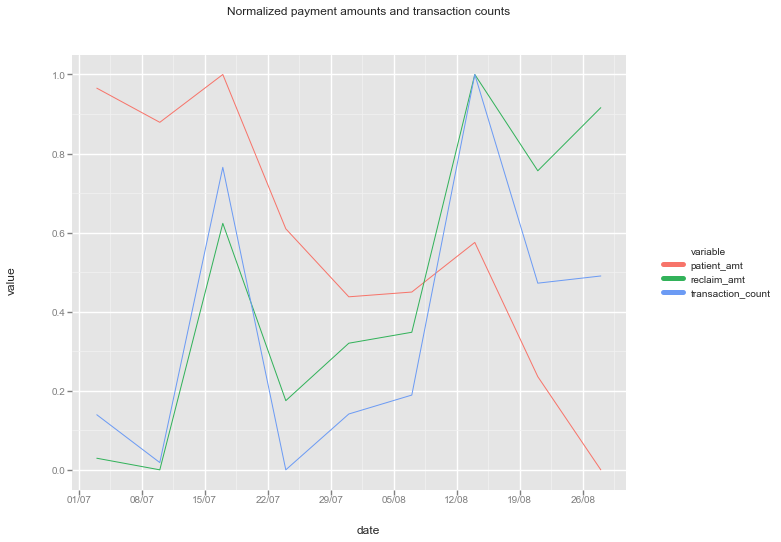

In [405]:
df_tmp = df_amt
df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp['2011-07-01' : '2011-09-01']
df_tmp['profit'] = df_tmp.patient_amt + df_tmp.reclaim_amt - df_tmp.wholesale_amt
df_tmp['profit_per_trans'] = df_tmp.profit / df_tmp.transaction_count
df_tmp = df_tmp.reset_index()

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

df_tmp = df_tmp.set_index('date')
colnames = df_tmp.columns.values
colnames = ['reclaim_amt', 'transaction_count', 'patient_amt']
x = df_tmp[colnames].dropna()
df_tmp = df_tmp.reset_index()
df_index = x.index
x_scaled = min_max_scaler.fit_transform(x)

df = pd.DataFrame(x_scaled, columns=colnames, index=df_index)
df = df.reset_index()

# TODO can I do this per year?
df_lng = pd.melt(df, id_vars=['date'])
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_lng) +\
    labs(title = 'Normalized payment amounts and transaction counts') +\
    geom_line() +\
    scale_x_date(labels = date_format("%d/%m"))

plot.save('16_norm_amt_aug_2012_to_sep_2012.svg', width=None, height=None, dpi=180)

## In relation to transaction volume. This again highlights that the patient amount is inverse to the reclaim amount with a sharp reset at 1st of January. The profit stays relatively even.

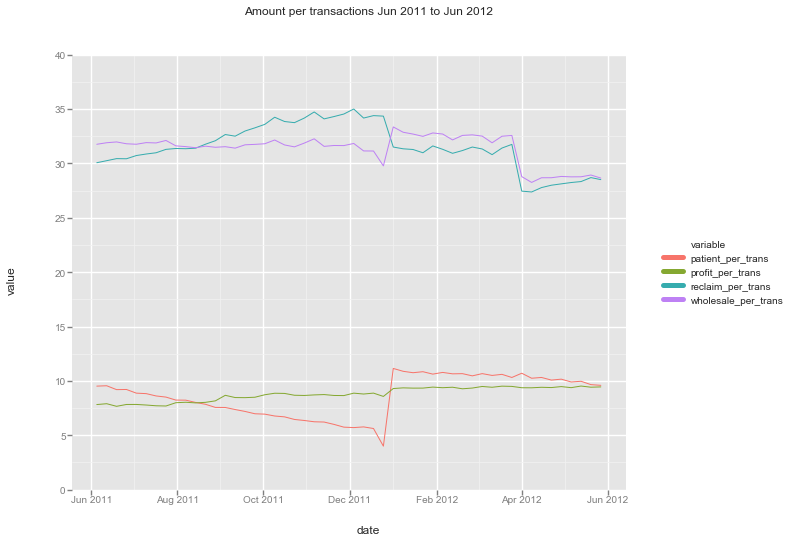

In [406]:
df_tmp = df_amt
df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp['2011-06-01' : '2012-06-01']
df_tmp['profit'] = df_tmp.patient_amt + df_tmp.reclaim_amt - df_tmp.wholesale_amt
df_tmp['profit_per_trans'] = df_tmp.profit / df_tmp.transaction_count
df_tmp['patient_per_trans'] = df_tmp.patient_amt / df_tmp.transaction_count
df_tmp['reclaim_per_trans'] = df_tmp.reclaim_amt / df_tmp.transaction_count
df_tmp['wholesale_per_trans'] = df_tmp.wholesale_amt / df_tmp.transaction_count
df_tmp = df_tmp.reset_index()

per_trans_cols = ['profit_per_trans', 'patient_per_trans', 'reclaim_per_trans', 'wholesale_per_trans']
df_tmp_ltd = pd.melt(df_tmp, id_vars=['date'], value_vars=per_trans_cols)
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_tmp_ltd) +\
    labs(title = 'Amount per transactions Jun 2011 to Jun 2012') +\
    geom_line() +\
    scale_y_continuous(limits=(0,40))

plot.save('17_amt_per_tran_jun_2011_to_2012.svg', width=None, height=None, dpi=180)

## So what is 1st Jan? the reset of the Government rebate - The medicare safetynet! which means that as people hit their threshold to get Government rebates they pay less. What is the incentive to get medications in December and not in January? to buy with the rebate in Dec before it is reset 1st of Jan and stock up for the beginning of the year. Talk to any chemist and they will tell you that the time between Christmass and New Years are the busiesst 5 days of the calendar. This explains the drop at the end of the year.

## and lets us plot the profit per transaction as a relatively smooth line, we have explained another drop off.

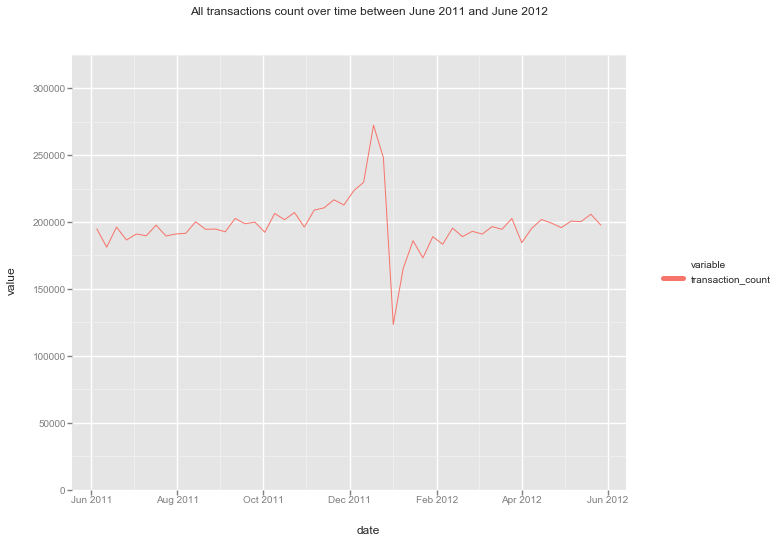

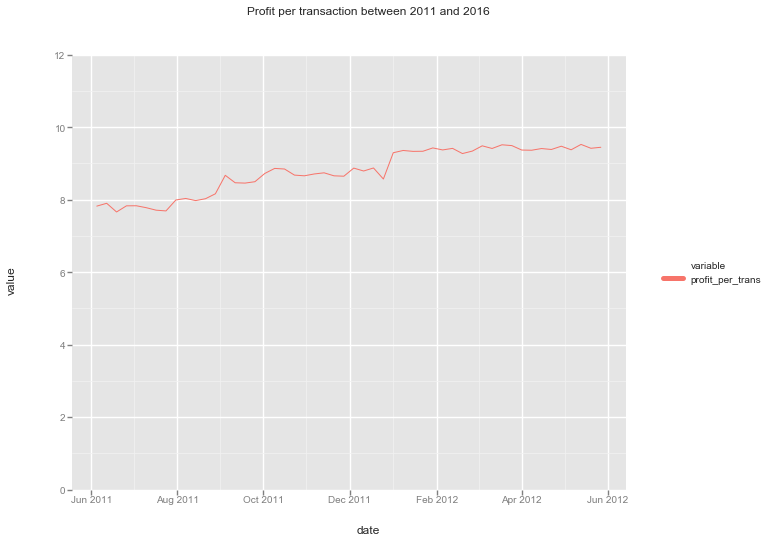

In [411]:
df_tmp = df_amt
df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp['2011-06-01' : '2012-06-01']
df_tmp['profit'] = df_tmp.patient_amt + df_tmp.reclaim_amt - df_tmp.wholesale_amt
df_tmp['profit_per_trans'] = df_tmp.profit / df_tmp.transaction_count
df_tmp = df_tmp.reset_index()

df_tmp_ltd = pd.melt(df_tmp, id_vars=['date'], value_vars=['transaction_count'])
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_tmp_ltd) +\
    labs(title = 'All transactions count over time between June 2011 and June 2012') +\
    geom_line() +\
    scale_y_continuous(limits=(0,325000))

plot.show()
plot.save('18_all_jun_2011_to_2012.svg', width=None, height=None, dpi=180)

df_tmp_ltd = pd.melt(df_tmp, id_vars=['date'], value_vars=['profit_per_trans'])
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_tmp_ltd) +\
    labs(title = 'Profit per transaction between 2011 and 2016') +\
    geom_line() +\
    scale_y_continuous(limits=(0,12))

plot.save('19_profit_per_tran_jun_2011_to_2012.svg', width=None, height=None, dpi=180)

## In fact extending the profit per transaction for all time introduces a rough spot end of 2016 but it even stabilises in the 2017 region where we had a cliff we saw before in a halving in transaction count

## Normalized view lets us see this

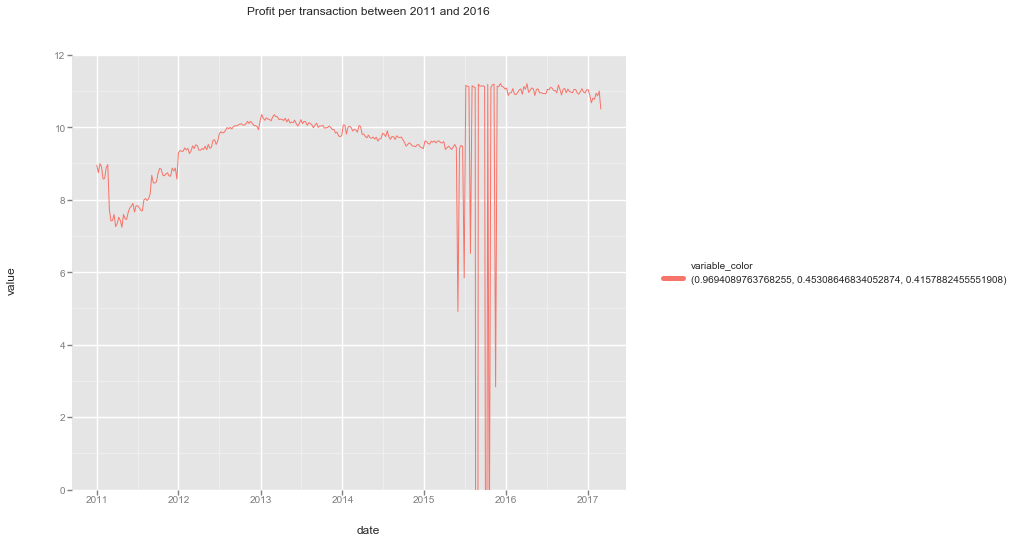

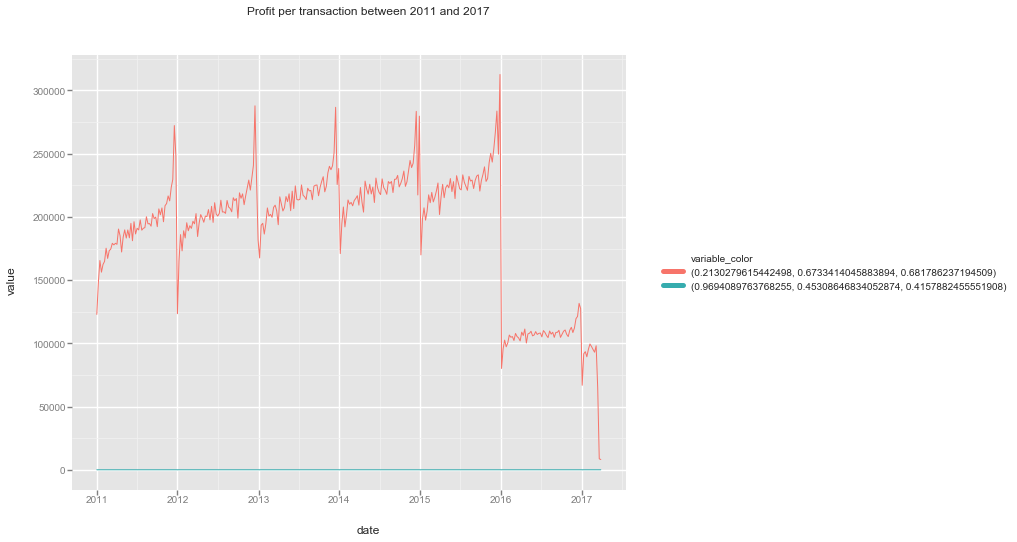

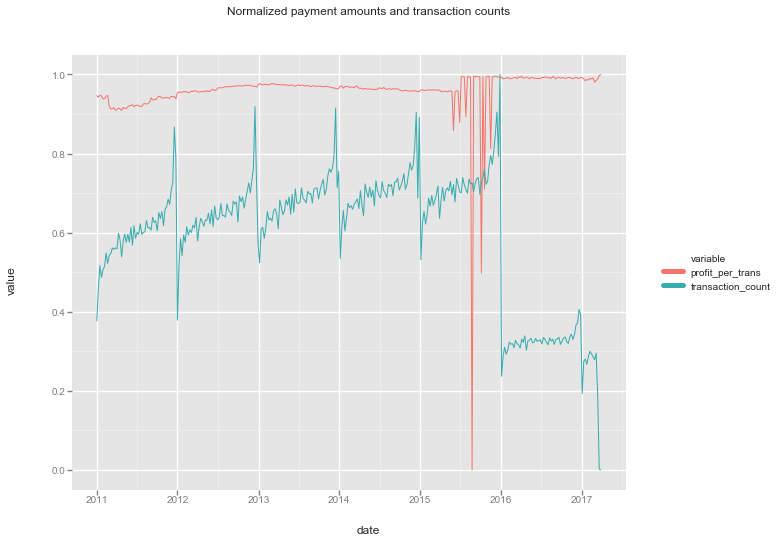

In [418]:
df_tmp = df_amt
df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp['2011-01-01' : '2017-03-01']
df_tmp['profit'] = df_tmp.patient_amt + df_tmp.reclaim_amt - df_tmp.wholesale_amt
df_tmp['profit_per_trans'] = df_tmp.profit / df_tmp.transaction_count
df_tmp = df_tmp.reset_index()

df_tmp_ltd = pd.melt(df_tmp, id_vars=['date'], value_vars=['profit_per_trans'])
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_tmp_ltd) +\
    labs(title = 'Profit per transaction between 2011 and 2016') +\
    geom_line() +\
    scale_y_continuous(limits=(0,12))

plot.save('20_profit_per_tran_2011_to_2017.svg', width=None, height=None, dpi=180)
plot.show()

df_tmp = df_amt
df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp['2011-01-01' : '2017-04-01']
df_tmp['profit'] = df_tmp.patient_amt + df_tmp.reclaim_amt - df_tmp.wholesale_amt
df_tmp['profit_per_trans'] = df_tmp.profit / df_tmp.transaction_count
df_tmp = df_tmp.reset_index()

df_tmp_ltd = pd.melt(df_tmp, id_vars=['date'], value_vars=['profit_per_trans', 'transaction_count'])
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_tmp_ltd) +\
    labs(title = 'Profit per transaction between 2011 and 2017') +\
    geom_line()
#     geom_line() +\
#     scale_y_continuous(limits=(0,12)))

plot.save('21_all_pp_tran_jun_2011_to_2012.svg', width=None, height=None, dpi=180)
plot.show()

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

df_tmp = df_tmp.set_index('date')
colnames = df_tmp.columns.values
colnames = ['transaction_count', 'profit_per_trans']
x = df_tmp[colnames].dropna()
df_tmp = df_tmp.reset_index()
df_index = x.index
x_scaled = min_max_scaler.fit_transform(x)

df = pd.DataFrame(x_scaled, columns=colnames, index=df_index)
df = df.reset_index()

# TODO can I do this per year?
df_lng = pd.melt(df, id_vars=['date'])
plot = ggplot(
    aes(x='date', y='value', colour='variable'),
    data=df_lng) +\
    labs(title = 'Normalized payment amounts and transaction counts') +\
    geom_line()

plot.save('22_all_pp_tran_jun_2011_to_2012_norm.svg', width=None, height=None, dpi=180)

## Now that we have a relatively smooth representation over time what is going on in 2017 where our profit per transaction is smooth but our volume drops to half?

## We looked at patient numbers and found that there are no records for patients 279201 or above after 2016 - the result is as expected. These patients were pulled out for a data competition

In [419]:
query = """\
SELECT
  SUM(CASE WHEN t.patient_id < 279201 THEN 1 ELSE 0 END) AS t_count_a
  , SUM(CASE WHEN t.patient_id >= 279201 THEN 1 ELSE 0 END) AS t_count_b
  , DATE(t.Dispense_Week) AS date
FROM dthon.transactions_all_c2 t
GROUP BY date
ORDER BY date ASC
"""

df_p_grp = pd.read_gbq(query, project_id)
df_p_grp.date = pd.Series(df_p_grp.date).apply(pd.to_datetime, format='%Y-%m-%d')
# df_all = df_all.set_index('date')
df_p_grp.head(3)

Waiting for job to complete...


,t_count_a,t_count_b,date
0,1,0,2008-03-09
1,1,0,2008-08-03
2,3,0,2008-11-02


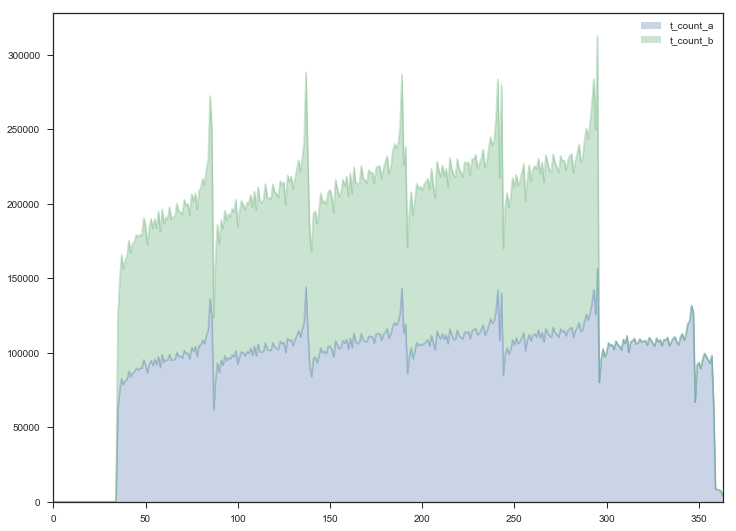

In [428]:
df_p_grp_ltd = pd.melt(df_p_grp[(df_p_grp.date >= '2011-01-01') & (df_p_grp.date < '2017-01-01')], id_vars=['date'])

# TODO how to area chart in ggplot under python???
# print(ggplot(
#     aes(x='date', y='value', colour='variable'),
#     data=df_p_grp_ltd) +\
#     scale_x_date(labels = date_format("%Y")) +\
#     geom_line())

# TODO worst case
df_p_grp.plot.area(stacked=True, alpha=.3)
fig = plt.gcf()
fig.set_size_inches(12, 9)
fig.savefig('23_patient_drop_out.svg', dpi=100)